In [23]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Rotary Wing Dataset

In [2]:
rw_df = pd.read_csv('RW_tail_numbers(cleaned).csv', header = 'infer', encoding = 'ISO-8859-1')

In [3]:
rw_df.head()

,Wing_type,tail_number,dates,aircraft,origin,destination,departure,arrival,duration,NAME,Duration(mins)
0,RW,N101AE,7-Feb-21,B06,"Near Terre Haute, IN","Near Bloomington, IN",07:12AM EST,09:14AM EST,2:01,AIR EVAC EMS INC ...,121
1,RW,N101AE,5-Feb-21,B06,Cooper,"Near Indianapolis, IN",07:35PM EST,08:28PM EST,0:52,AIR EVAC EMS INC ...,52
2,RW,N101AE,5-Feb-21,B06,"Near Indianapolis, IN",Indianapolis Intl,01:02PM EST,01:08PM EST,0:05,AIR EVAC EMS INC ...,5
3,RW,N101AE,2-Feb-21,B06,"Near Indianapolis, IN",Marcidale,03:54PM EST,04:56PM EST,1:01,AIR EVAC EMS INC ...,61
4,RW,N101AE,23-Jan-21,B06,Frasca Fld,"Near ChampaignUrbana, IL",09:31PM CST,09:38PM CST,0:06,AIR EVAC EMS INC ...,6


In [4]:
rw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140845 entries, 0 to 140844
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Wing_type       140845 non-null  object
 1   tail_number     140845 non-null  object
 2   dates           140845 non-null  object
 3   aircraft        133203 non-null  object
 4   origin          140834 non-null  object
 5   destination     140841 non-null  object
 6   departure       140845 non-null  object
 7   arrival         140676 non-null  object
 8   duration        140641 non-null  object
 9   NAME            140845 non-null  object
 10  Duration(mins)  140845 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 11.8+ MB


In [5]:
# Check count of null values for the rotary wing dataset
rw_df.isna().sum()

Wing_type            0
tail_number          0
dates                0
aircraft          7642
origin              11
destination          4
departure            0
arrival            169
duration           204
NAME                 0
Duration(mins)       0
dtype: int64

In [6]:
len(rw_df.index)

140845

In [7]:
# Let's drop null values
rw_df = rw_df.dropna()

In [8]:
# Let's check any duplicates
rw_df.duplicated().sum()

0

### Let's perform analysis for the rotary wing dataset

In [9]:
pd.DataFrame(rw_df.NAME.unique(), columns=['Air Medical Service Names'])

,Air Medical Service Names
0,AIR EVAC EMS INC ...
1,AIR FIRST LLC ...
2,AIR MD LLC ...
3,AIR MEATHODS CORP ...
4,AIR MED SERVICES LLC ...
...,...
89,TRISTATE CARFLIGHT LLC ...
90,TWO BEAR AIR RESCUE FOUNDATION ...
91,UNIVERSITY OF CINCINNATI MEDICAL CENTER LLC ...
92,VARIETY CHILDRENS HOSPITAL INC DBA ...


The rotary wing data represents 94 unique air medical services. Let us count rotary wings with tail numbers.

In [26]:
pd.DataFrame(rw_df.groupby("NAME").tail_number.nunique().sort_values(ascending=False))

,tail_number
NAME,
AIR METHODS CORP,214
AIR EVAC EMS INC,97
PHI HEALTH LLC,92
ERA HELICOPTERS LLC,62
PHI AVIATION LLC,42
...,...
NORTH SHORE-LIJ AND YALE NEW HAVEN HEALTH MEDICAL,1
CRITICAL CARE SERVICE INC DBA,1
COOK CHILDREN'S HEALTH ENTERPRISES,1


Let us visualize top 10 service provider having total unique tail numbers

In [24]:
tailnum_df = pd.DataFrame(rw_df.groupby("NAME").tail_number.nunique().sort_values(ascending=False)).reset_index()

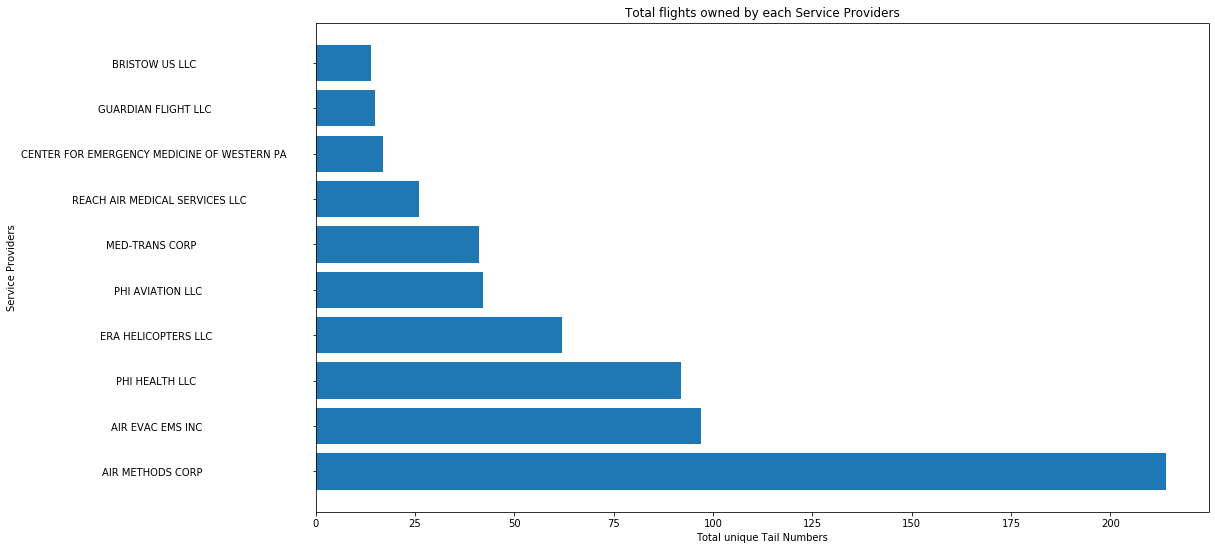

In [25]:
serv_name = tailnum_df.NAME.head(10) 
tail_count = tailnum_df.tail_number.head(10)
  
fig, ax = plt.subplots(figsize =(16, 9))  
ax.barh(serv_name, tail_count) 
  
ax.set_title("Total flights owned by each Service Providers")
plt.xlabel("Total unique Tail Numbers")
plt.ylabel("Service Providers")  
plt.show() 

In [12]:
pd.DataFrame(rw_df.NAME.value_counts()).rename(columns={"NAME":"Total Services"})

,Total Services
AIR METHODS CORP,39747
PHI HEALTH LLC,14945
AIR EVAC EMS INC,10331
MED-TRANS CORP,7556
PHI AVIATION LLC,5290
...,...
SAINT VINCENTS HEALTHCARE,25
PRIME HEALTHCARE AIR TRANSPORTATION LLC,11
AIR MEDICAL SERVICES LLC,8
TRANSCARE AMBULANCE SERVICES INC,2


Let us visualize top 10 most service providers

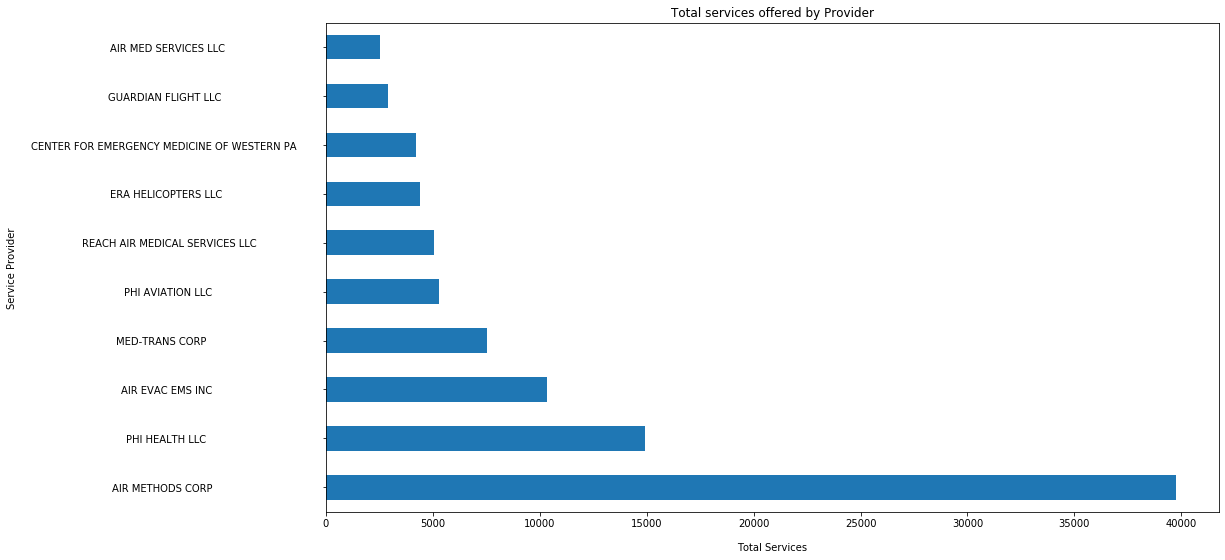

In [27]:
rw_df.NAME.value_counts().head(10).plot(kind='barh', figsize=(16, 9)) 
plt.xlabel("Total Services", labelpad=14)
plt.ylabel("Service Provider", labelpad=14)
plt.title("Total services offered by Provider")
plt.show()

In [13]:
# Convert data type of date from object to date time
rw_df["dates"] = rw_df['dates'].astype('datetime64[ns]')

In [16]:
# Count number of rotary wings for each departure day
num_flights = pd.DataFrame(rw_df.dates.value_counts()).sort_index()
num_flights.head()

,dates
2020-10-30,521
2020-10-31,1921
2020-11-01,1569
2020-11-02,1705
2020-11-03,1923


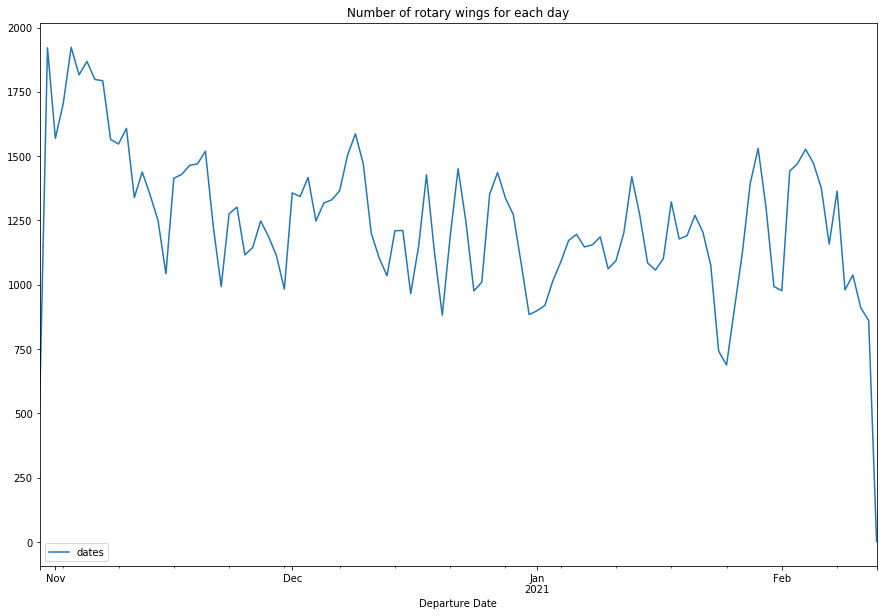

In [18]:
# Let's visualize the number of rotary wings for each day

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
num_flights.plot(ax=ax)
plt.title("Number of rotary wings for each day")
plt.xlabel("Departure Date")
plt.legend(loc = "lower left")
plt.show()

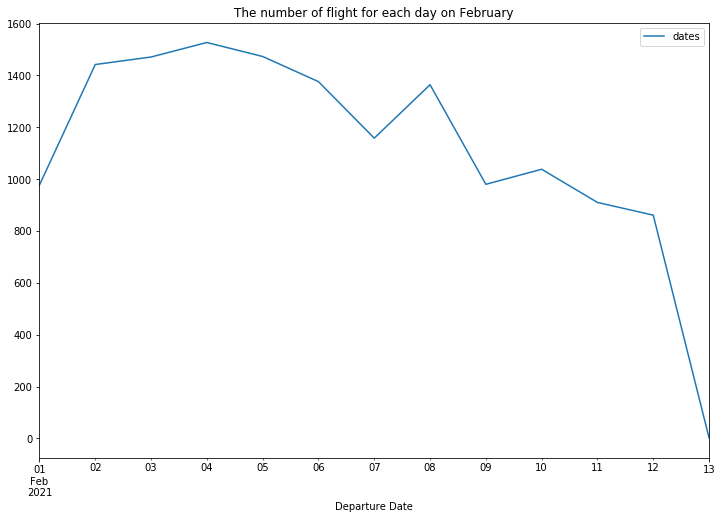

In [19]:
# Look closer to the February
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
num_flights.loc["Feb-2021"].plot(ax=ax)
plt.title("The number of flight for each day on February")
plt.xlabel("Departure Date")
plt.show()

In [20]:
# Group by date and take average of rotary wing duration
avg_duration = rw_df.groupby([rw_df.dates])['Duration(mins)'].mean().reset_index(name='Average Duration')
avg_duration.head()

,dates,Average Duration
0,2020-10-30,26.310940
1,2020-10-31,27.529932
2,2020-11-01,27.006373
3,2020-11-02,27.523167
4,2020-11-03,29.072283


In [21]:
avg_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dates             107 non-null    datetime64[ns]
 1   Average Duration  107 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


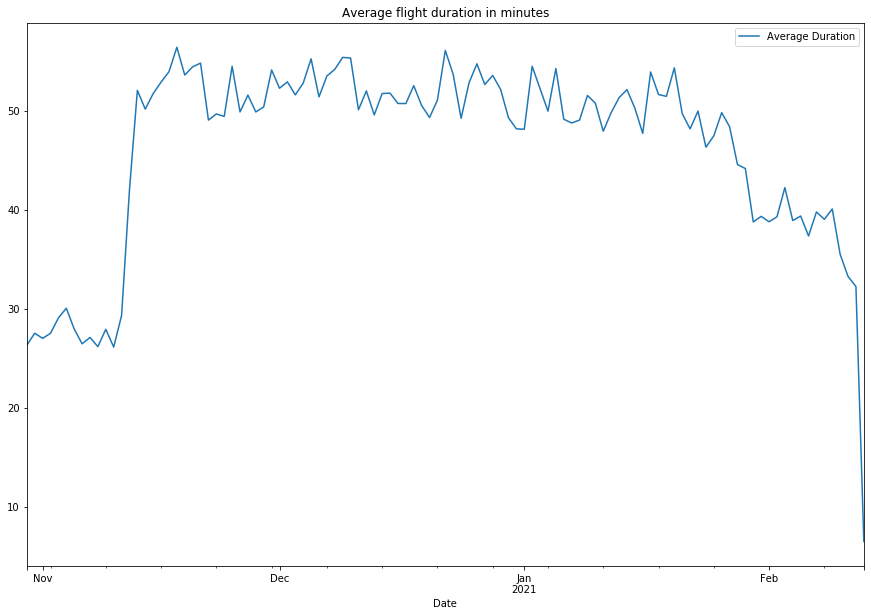

In [22]:
# Let's visualize the average duration
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
avg_duration.plot(x='dates', y='Average Duration', ax=ax)
plt.title("Average flight duration in minutes")
plt.xlabel("Date")
plt.show()